In [ ]:
!pip install mne
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
import mne
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import spectrogram, get_window
from IPython.display import Audio

# Función para graficar el espectrograma
def plot_spectrogram(signal, sample_rate, overlapping = 0., window_type='hann', window_size=256):
    """
    Genera y grafica el espectrograma de una señal.

    Parámetros:
    - signal: la señal de audio
    - window_type: el tipo de ventana a usar (string, por ejemplo 'hann', 'hamming', etc.)
    - window_size: tamaño de la ventana (entero)
    - overlapping: porcentaje de solapamiento (valor entre 0 y 1)
    - fs: frecuencia de muestreo de la señal
    """
    # Crear la ventana
    window = get_window(window_type, window_size)

    # Calcular el paso de la ventana en función del solapamiento
    noverlap = int(overlapping * window_size)

    # Calcular el espectrograma usando scipy.signal.spectrogram
    f, t, Sxx = spectrogram(signal, fs=sample_rate, window=window,
                            nperseg=window_size, noverlap=noverlap)


    # Graficar el espectrograma
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title('Espectrograma')
    plt.ylabel('Frecuencia [Hz]')
    plt.xlabel('Tiempo [s]')
    plt.colorbar(label='Amplitud [dB]')
    plt.show()


Extracting EDF parameters from /content/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
(21, 2000)


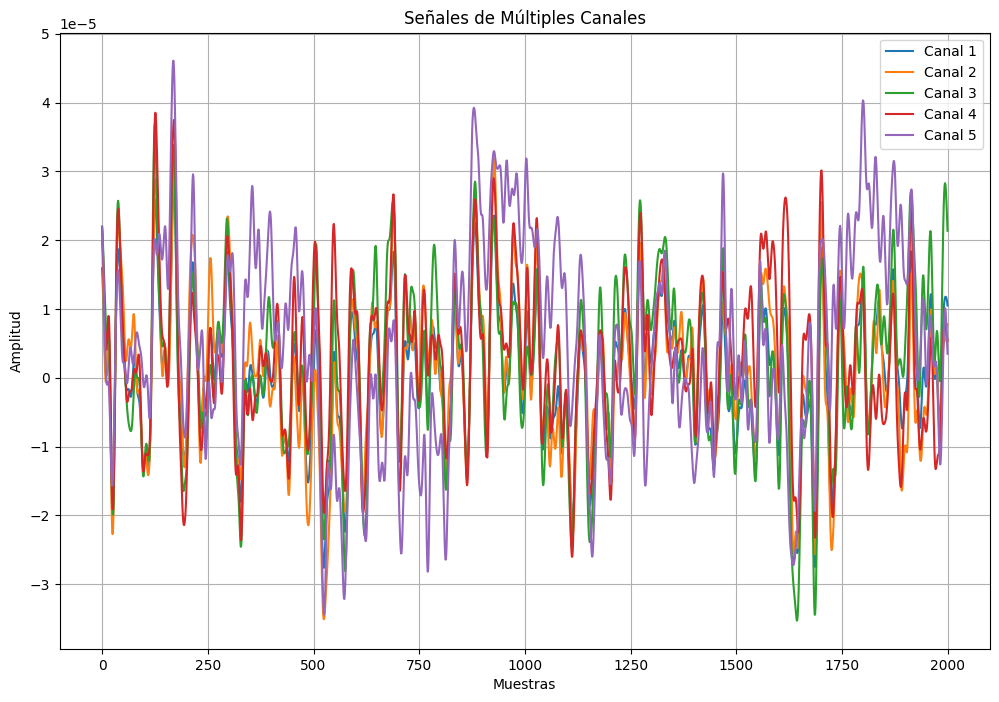

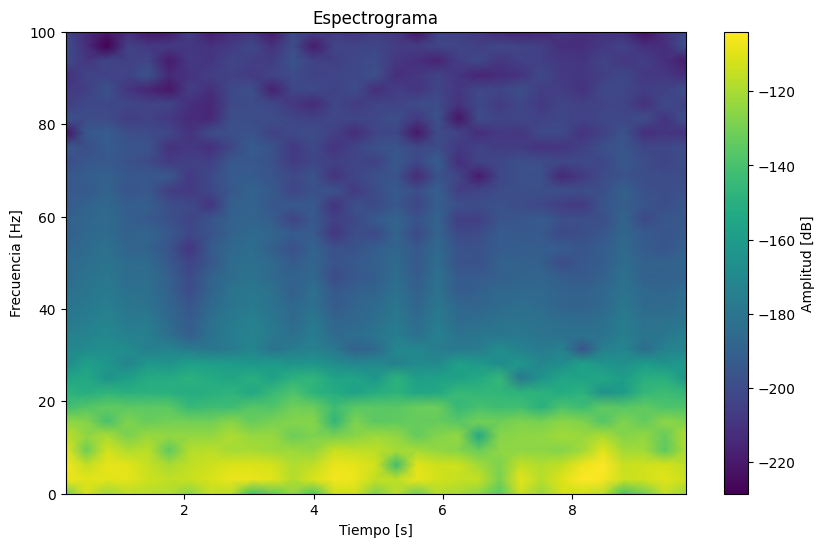

In [ ]:
file = "./Subject00_1.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()[:,4000:6000]
# you can get the metadata included in the file and a list of all channels:
# Seleccionar un canal a graficar, por ejemplo, el primer canal (índice 0)
# Graficar los primeros 5 canales


# Número de muestras y canales
n_channels, n_samples = raw_data.shape
print(raw_data.shape)
n_plot_channels = min(5, n_channels)

plt.figure(figsize=(12, 8))
for i in range(n_plot_channels):
    plt.plot(raw_data[i, :] + i * 1e-6, label=f'Canal {i + 1}')  # Desplazamiento vertical para visualizar mejor
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señales de Múltiples Canales')
plt.legend()
plt.grid(True)
plt.show()

plot_spectrogram(raw_data[0,:], 200, window_type='hann', window_size=64, overlapping=0.)


In [ ]:
!pip install mne
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 5.7 MB/s eta 0:00:00


(30000,)


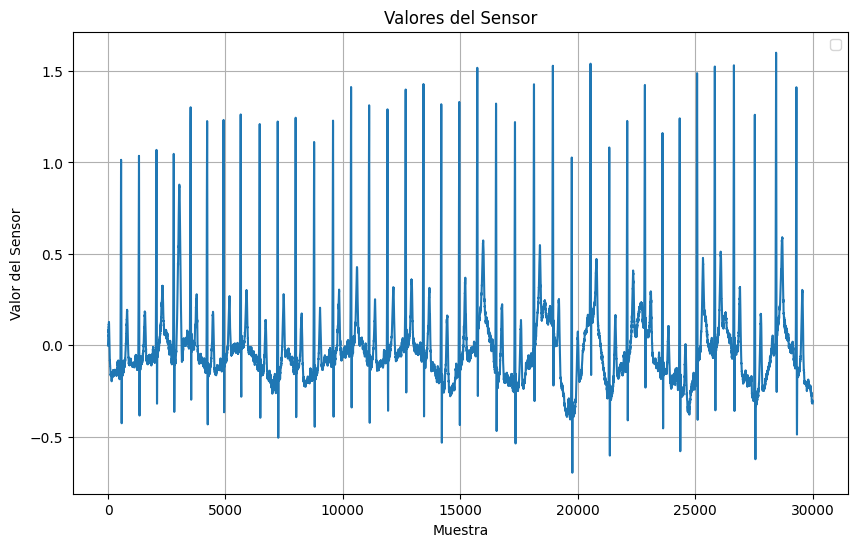

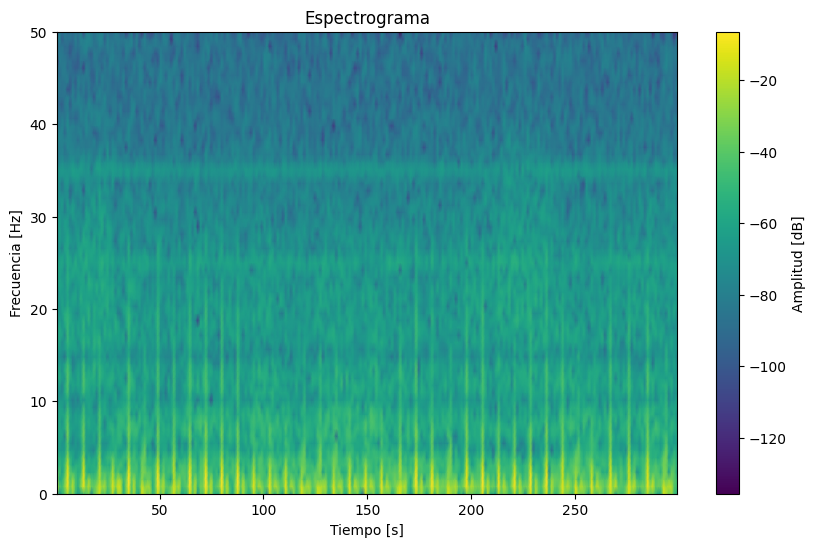

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Abre el archivo .dat en modo binario
record_name = './ARR_01'

# Cargar el archivo .dat y su metainformación
record = wfdb.rdrecord(record_name)

# Acceder a los datos de la señal
signals = record.p_signal[30000:60000,0]
print(signals.shape)

# Graficar los valores del sensor
plt.figure(figsize=(10, 6))
plt.plot(signals)
plt.xlabel('Muestra')
plt.ylabel('Valor del Sensor')
plt.title('Valores del Sensor')
plt.legend()
plt.grid(True)
plt.show()

plot_spectrogram(signals, 100, window_type='hann', window_size=128, overlapping=0.)
